In [1]:
#Modules.
from Classes import *
import AgeFunctions as fun

%matplotlib inline
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
#SIR-model for one season, with three age structures.
import numpy as np
from scipy.integrate import odeint

def SIRage(R0,s0,stepsSeason,smallPopulation=False):
    nu = 0.5
    beta = nu*R0
    N = 1000000.0
    
    #Get population distribution and next-generation matrix (of the total population).
    frequencies = fun.givePopulationDemocraphy()
    PopulationNGM, StratifiedNGM = fun.giveNGM(R0)

    if sum(N*s0) < 100:
        print 'Warning: N to small'
        
    def derivative(y,t):
        #S=y[0:3], I=y[3:6], R=y[6:9]
        
        dSdt = -(nu/N)*y[0:3]*dot(PopulationNGM,y[3:6])
        dIdt = (nu/N)*y[0:3]*dot(PopulationNGM,y[3:6]) - nu*y[3:6]
        dRdt = nu*y[3:6]
        
        return np.concatenate([dSdt, dIdt, dRdt])

    endTime = 1000
    time = np.linspace(0.0,endTime,stepsSeason)
    
    Sinit = (s0-0.0001)*frequencies*N
    Iinit = 0.00001*frequencies*N
    Rinit = (1.0-s0)*frequencies*N
    
    yinit = np.concatenate([Sinit,Iinit,Rinit])

    y = odeint(derivative,yinit,time)
    
    return time, y/N

0.000804880328328


0.00080887131323232773

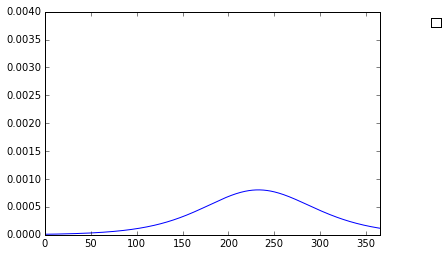

In [3]:
R0 = 1.4

s0 = 0.75*np.ones(3)#np.array([0.55231846,0.59525588,0.67774278])
time,y = SIRage(R0,s0,1000)

#plot(time,y)

xlim([0,365])
ylim([0,0.004])

legend(['S1','S2','S3','I1','I2','I3','R1','R2','R3'],bbox_to_anchor=(1.2, 1.))

plot(time,np.sum(y[:,3:6],axis=1))
#plot(time,np.sum(y[:,6:9],axis=1))




print max(np.sum(y[:,3:6],axis=1))
fun.peakIncidence(R0,s0)

In [4]:
print 'Final size SIR:'
print np.sum(y[:,6:9],axis=1)[-1]-np.sum(y[:,6:9],axis=1)[0]

print 'Final size equation:'
PopulationNGM, StratifiedNGM = fun.giveNGM(R0)

frequencies = fun.givePopulationDemocraphy()
print sum(fun.findFinalSize(R0,StratifiedNGM,s0)*frequencies)

Final size SIR:
0.0651223896558
Final size equation:
0.400691880286
